In [1]:

#Import the libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import metrics
from sklearn import preprocessing 
from sklearn.preprocessing import Imputer 
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline
sns.set()


Please refer to the attached image in mail to see the descrption of each column of the dataset

In [3]:
#read our csv file

df=pd.read_csv('sample.csv',encoding = "ISO-8859-1" )

In [4]:
#observe a few records

df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [4]:
# Lets see our data dimensions
df.shape

# Thats a huge number of records !

(371528, 20)

In [5]:
# Lets understand how well all columns are filled and if they have any null entries to be filled/processed
df.isnull().sum()

# We observe that 5 columns have a lot of missing data and we will shortly process this data loss

dateCrawled                0
name                       0
seller                     0
offerType                  0
price                      0
abtest                     0
vehicleType            37869
yearOfRegistration         0
gearbox                20209
powerPS                    0
model                  20484
kilometer                  0
monthOfRegistration        0
fuelType               33386
brand                      0
notRepairedDamage      72060
dateCreated                0
nrOfPictures               0
postalCode                 0
lastSeen                   0
dtype: int64

In [6]:
# Lets observe some important statistics of numerical columns like min ,max ,SD, mean
df.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode
count,3.715280e+05,371528.000000,371528.000000,371528.000000,371528.000000,371528.0,371528.00000
mean,1.729514e+04,2004.577997,115.549477,125618.688228,5.734445,0.0,50820.66764
std,3.587954e+06,92.866598,192.139578,40112.337051,3.712412,0.0,25799.08247
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.00000
25%,1.150000e+03,1999.000000,70.000000,125000.000000,3.000000,0.0,30459.00000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,0.0,49610.00000
75%,7.200000e+03,2008.000000,150.000000,150000.000000,9.000000,0.0,71546.00000
max,2.147484e+09,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.00000


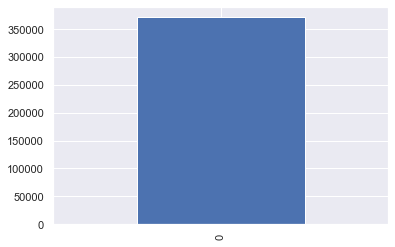

In [6]:
# As it is mentioned in the data description that column no_of_pictures 
# has by default all entries as 0 and was recorded incorrectly by the crawler we can see that all 371528 records has value 0

df.nrOfPictures.value_counts().plot(kind='bar')

# Thus this column is not at all useful and we will delete it further

privat        371525
gewerblich         3
Name: seller, dtype: int64

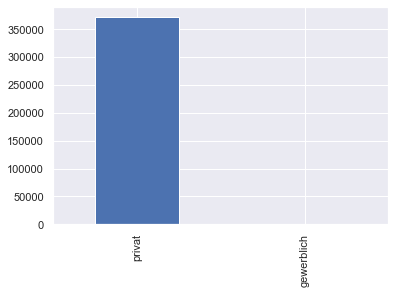

In [7]:
# Lets observe our sellers
df.seller.value_counts().plot(kind='bar')
df.seller.value_counts()

# we notice that only 3 seller are of type gewweblich and rest our privat
# So this column is not useful for our analysis to gain important insights for model prediction . We will delete this column too.

Angebot    371516
Gesuch         12
Name: offerType, dtype: int64

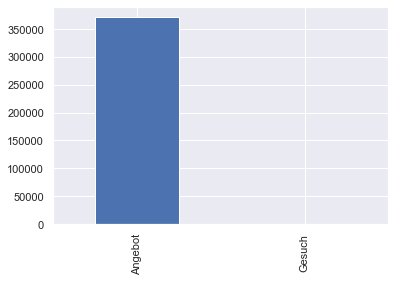

In [9]:
# What about offerType?? Let's Analyze

df.offerType.value_counts().plot(kind='bar')
df.offerType.value_counts()

# Just 12 Gesuch Records! This won't be a good column to help decide our predictions. 

In [8]:
# As discussed we will drop these columns that don't contribute to significant results of insights
columns = ['seller','offerType','nrOfPictures','name','dateCrawled','dateCreated','lastSeen','postalCode']


Also name of the car and postal code in our context seem to be useless to predict the price of car. The ad registrations and last seen dates also don't make a high impact regarding the price of a used car. So we delete all these columns.

In [9]:
df.drop(columns, inplace=True, axis=1)

In [10]:
df.shape
# Observe the columns reduced from 20 to 12 now
# Lets keep analyzing!

(371528, 12)

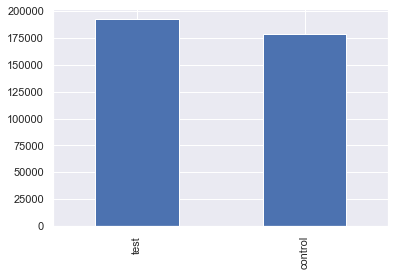

In [11]:
df.abtest.value_counts().plot(kind='bar')

# Both values seem imp, we need to keep this column

In [14]:
# Lets see our data now
df.head()

,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
0,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN
1,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja
2,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN
3,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein
4,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein


In [12]:
# Handle Missing Data?
# Lets check empty values in gearbox
df.gearbox.isnull().sum()
# Should we fill these missing 20209 entries with manuell or automatik ? By the one which occurs the most?

20209

In [13]:
# A better way would be to see the brand of car and fill gearbox accordingly
df.groupby("brand").gearbox.value_counts()

brand       gearbox  
alfa_romeo  manuell       2064
            automatik      146
audi        manuell      20841
            automatik    10698
bmw         manuell      25323
                         ...  
trabant     automatik        2
volkswagen  manuell      64655
            automatik    10264
volvo       manuell       2217
            automatik      991
Name: gearbox, Length: 80, dtype: int64

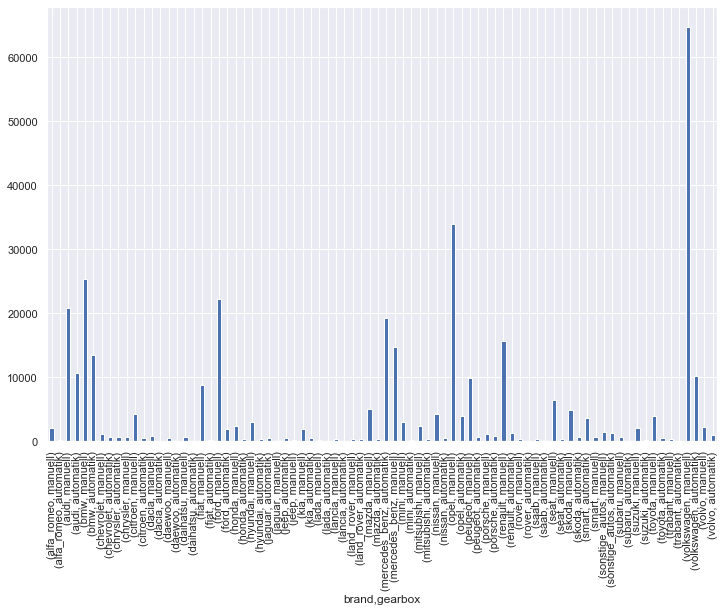

In [14]:
plt.figure(figsize=(12, 8))  

df.groupby("brand")["gearbox"].value_counts().plot(kind='bar')


In [15]:
#Logic to fill missing data of gearbox by most occuring brand gearbox type
groups_max=dict()
brand_names= df.brand.unique()
brand_names

for i in brand_names:
    gear_values=df[df.brand==i]['gearbox'].value_counts()
    groups_max[i]=gear_values.index[0]

    
    

In [16]:
for i in brand_names:
    df.loc[(df.brand == i) & (df.gearbox.isnull()) ,"gearbox" ] = groups_max[i]

In [24]:
# Cheers ! The gearbox has no missing data now
df.gearbox.isnull().sum()
df.head(100)
df.vehicleType.unique()

array(['kleinwagen', 'coupe', 'suv', 'limousine', 'cabrio', 'bus',
       'kombi', 'andere'], dtype=object)

In [18]:
# For fuel and repaired damage lets fill NA with most frequent values 
df['fuelType'].fillna('Benzin',inplace=True)
df["notRepairedDamage"].fillna("nein",inplace = True)
df["model"].fillna("golf",inplace =True)



In [19]:
# Now lets check and confirm that only 1 column needs cleaning
df.isnull().sum()

price                      0
abtest                     0
vehicleType            37869
yearOfRegistration         0
gearbox                    0
powerPS                    0
model                      0
kilometer                  0
monthOfRegistration        0
fuelType                   0
brand                      0
notRepairedDamage          0
dtype: int64

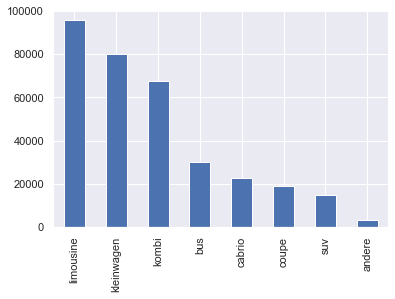

In [20]:
# For vehicle type we observe that top two-three values are equally distributed
df.vehicleType.value_counts().plot(kind='bar')


In [21]:
# Lets fill this by fuel type as done previosuly by group by for gear_box

#Logic to fill missing data of gearbox by most occuring brand gearbox type
groups_max=dict()
fuel_names= df.fuelType.unique()
fuel_names

for i in fuel_names:
    var_val=df[df.fuelType==i]['vehicleType'].value_counts()
    groups_max[i]=var_val.index[0]
    

In [22]:
for i in fuel_names:
    df.loc[(df.fuelType == i) & (df.vehicleType.isnull()) ,"vehicleType" ] = groups_max[i]

In [23]:
# Cheers! The data is clean and set to be learned by our model

df.isnull().sum()


price                  0
abtest                 0
vehicleType            0
yearOfRegistration     0
gearbox                0
powerPS                0
model                  0
kilometer              0
monthOfRegistration    0
fuelType               0
brand                  0
notRepairedDamage      0
dtype: int64

In [25]:
df.head()
df.shape

(371528, 12)

In [31]:
#df_dummies = pd.get_dummies(df, columns=['abtest', 'fuelType', 'brand', 'notRepairedDamage','model','vehicleType','gearbox'])
df_dummies= pd.get_dummies(df, columns=['abtest', 'fuelType', 'brand', 'notRepairedDamage','model','vehicleType','gearbox'], drop_first=True)


In [32]:
df_dummies.head()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,abtest_test,fuelType_andere,fuelType_benzin,fuelType_cng,fuelType_diesel,...,model_z_reihe,model_zafira,vehicleType_bus,vehicleType_cabrio,vehicleType_coupe,vehicleType_kleinwagen,vehicleType_kombi,vehicleType_limousine,vehicleType_suv,gearbox_manuell
0,480,1993,0,150000,0,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
1,18300,2011,190,125000,5,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
2,9800,2004,163,125000,8,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,1500,2001,75,150000,6,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
4,3600,2008,69,90000,7,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1


In [33]:
#Filter the outliers in our dataset

df_final = df_dummies[(df_dummies.yearOfRegistration < 2017)  & (df_dummies.yearOfRegistration > 1950)]
df_final = df_dummies[(df_dummies.price > 100) & (df_dummies.price < 200000) ]



In [34]:
df_dummies.yearOfRegistration.value_counts()

2000    24551
1999    22767
2005    22316
2006    20230
2001    20218
        ...  
1919        1
1915        1
7800        1
1400        1
8455        1
Name: yearOfRegistration, Length: 155, dtype: int64

In [35]:
# lets seperate the output and input

X = df_final.drop('price',axis=1)
y = df_final.price



In [36]:
# Check model performance by spilting our data
x_train, x_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=0)


In [41]:
# We are using Linear Regression to know how our target depends on our input features

linreg = LinearRegression()
linreg.fit(x_train, y_train)
y_pred = linreg.predict(x_test)

In [44]:
#Time to compare

# These are the actual values of known data
y_pred[0:4]


array([1998.91518632, 7783.82738488, 3916.44758164, 8498.24709922])

In [46]:
np.array(y_test[0:4])

array([ 2600,  7999,  2850, 10900], dtype=int64)